## FaceForensics++

### Loading Features

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file = open('train_3200.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]

### Check Spectrum

Text(0, 0.5, 'Power Spectrum')

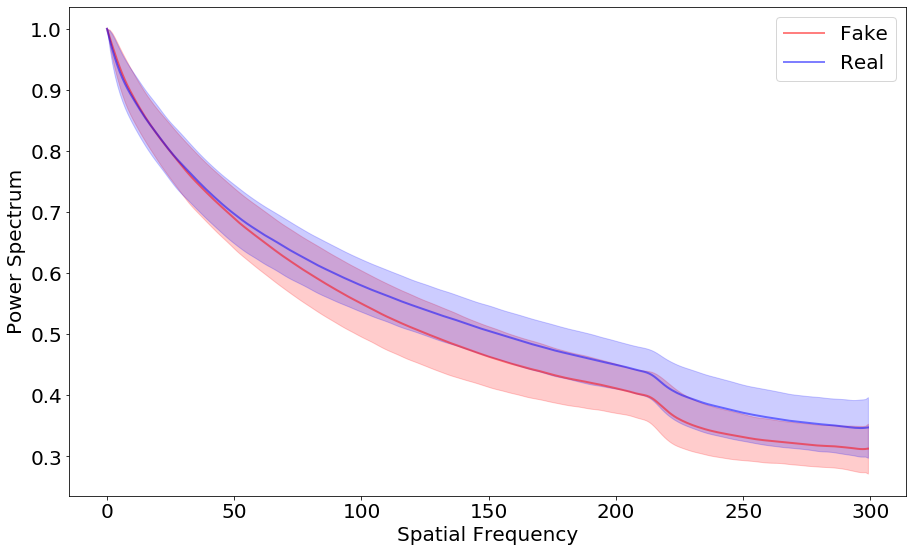

In [3]:
num = int(X.shape[0]/2)
num_feat = X.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X.shape[0]):
    if y[x]==0:
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif y[x]==1:
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

### Classification per Frame

In [229]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle

#train
pkl_file = open('train_3200.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]

svclassifier_r = SVC(C=6.37, kernel='rbf', gamma=0.86)
svclassifier_r.fit(X, y)
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X, y)

#test
pkl_file = open('test_full.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X_ = data["data"]
y_ = data["label"]

SVM = svclassifier_r.score(X_, y_)
LR = logreg.score(X_, y_)
print("SVM: "+str(SVM))
print("LR: "+str(LR))

SVM: 0.848956043956044
LR: 0.7847802197802198


### Classification per Video

In [231]:
#load folder relation
names = np.load("folderNames.npy")
pred = svclassifier_r.predict(X_)
#pred = logreg.predict(X_)

list_ = []
list_pred = []
list_y = []
for x in range(len(names)):
    temp = names[x]

    if temp not in list_:
        list_.append(temp)
        
        res = 0
        res_ = 0
        cont = 0
        for z in range(len(names)):
            if temp == names[z]:
                res += pred[z]
                res_ += y_[z]
                cont +=1
        
        res = res/cont
        res_ = res_/cont        
        if res < 0.55:
            res = 0
        else:
            res = 1
        list_pred.append(res)
        list_y.append(res_)
        
pred2 = np.array(list_pred)
y2 = np.array(list_y)

res = pred2+y2
# fakes
cont = 0
for x in range(len(res)):
    if res[x] == 0:
        cont +=1
print("correct fakes %d"%(cont))
cont2 = 0
for x in range(len(res)):
    if res[x] == 2:
        cont2 +=1
print("correct real %d"%(cont2))
cont3 = 0
for x in range(len(res)):
    if res[x] == 1:
        cont3 +=1
print("wrong %d"%(cont3))
print("total %d"%(len(res)))
correct = len(res) - cont3
print("SVM Accuracy: %f" % (correct/len(res)))

correct fakes 849
correct real 59
wrong 106
total 1014
SVM Accuracy: 0.895464
